In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Файл(ы) "0.jpg" размером 4415 байт загружен(ы)
Файл(ы) "1.jpg" размером 2738 байт загружен(ы)
Файл(ы) "2.jpg" размером 4650 байт загружен(ы)
Файл(ы) "3.jpg" размером 4523 байт загружен(ы)
Файл(ы) "4.jpg" размером 6189 байт загружен(ы)
Файл(ы) "5.jpg" размером 6925 байт загружен(ы)
Файл(ы) "6.jpg" размером 9374 байт загружен(ы)
Файл(ы) "7.jpg" размером 4673 байт загружен(ы)
Файл(ы) "8.jpg" размером 5407 байт загружен(ы)
Файл(ы) "9.jpg" размером 5344 байт загружен(ы)


In [3]:
#Подключение библиотек
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from keras.models import Model 
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

In [4]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 28, 28
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных MNIST
classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
(s_X_train, y_train), (s_X_test, y_test) = mnist.load_data()
print(y_train)

11501568/11490434 [==============================] - 0s 0us/step
[5 0 4 ... 5 6 8]


In [6]:
sample_shape = s_X_train[0].shape
img_width, img_height = sample_shape[0], sample_shape[1]
input_shape = (img_width, img_height, 1)

num_train = 60000
num_test = 10000

print(input_shape)

(28, 28, 1)


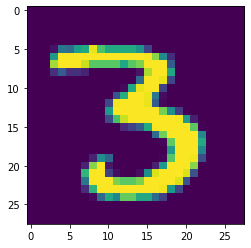

Номер класса: 3
Тип объекта: 3


In [7]:
n = 12
plt.imshow(s_X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n]])

In [8]:
#Нормализуем данные
X_train = s_X_train.reshape(num_train, img_width, img_height, 1).astype('float32')
X_test = s_X_test.reshape(num_test, img_width, img_height, 1).astype('float32')
X_train /= 255
X_test /= 255
#Преобразуем правильные ответы в формат one hot encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=input_shape, activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

In [10]:
#Печатаем информацию о сети
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                        

In [11]:
#Компилируем модель
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/25
422/422 - 17s - loss: 0.2263 - accuracy: 0.9268 - val_loss: 0.0505 - val_accuracy: 0.9860 - 17s/epoch - 39ms/step
Epoch 2/25
422/422 - 7s - loss: 0.0663 - accuracy: 0.9796 - val_loss: 0.0299 - val_accuracy: 0.9915 - 7s/epoch - 17ms/step
Epoch 3/25
422/422 - 7s - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0318 - val_accuracy: 0.9908 - 7s/epoch - 17ms/step
Epoch 4/25
422/422 - 7s - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0295 - val_accuracy: 0.9922 - 7s/epoch - 17ms/step
Epoch 5/25
422/422 - 7s - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0283 - val_accuracy: 0.9918 - 7s/epoch - 17ms/step
Epoch 6/25
422/422 - 7s - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0279 - val_accuracy: 0.9920 - 7s/epoch - 17ms/step
Epoch 7/25
422/422 - 7s - loss: 0.0252 - accuracy: 0.9916 - val_loss: 0.0271 - val_accuracy: 0.9933 - 7s/epoch - 17ms/step
Epoch 8/25
422/422 - 7s - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0241 - val_accuracy: 0.9940 - 7s/epoch - 17ms/step
Epoch 9/25
422

Точность работы на тестовых данных: 99.41%


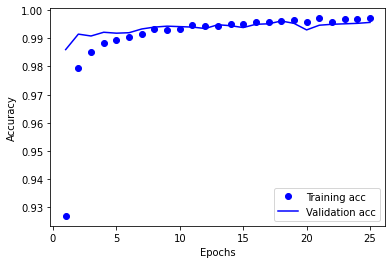

In [13]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

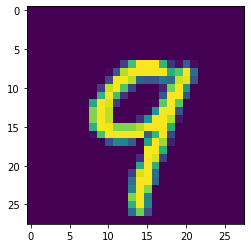

In [15]:
index=12
plt.imshow(s_X_test[index])
plt.show()

In [16]:
x = X_test[index]
x = np.expand_dims(x, axis=0)
#Запуск распознавания
prediction = model.predict(x)
#Печатаем результаты распознавания
print(prediction)

[[8.1064704e-15 8.0791995e-14 1.7738476e-14 7.1699661e-13 2.5027182e-07
  1.3521472e-13 9.0544580e-17 2.2525140e-09 1.1503729e-09 9.9999976e-01]]


In [17]:
#Преобразуем результаты из формата one hot encoding
prediction = np.argmax(prediction)
print(classes[prediction])

9


In [18]:
#Печатаем правильный ответ
print(classes[y_test[index]])

9


In [19]:
import os

list_images = os.listdir('/content')[1:-1]

In [20]:

predictions = dict()

for img_path in list_images:
  img = image.load_img(os.path.join(img_path), target_size=(28, 28), color_mode = "grayscale")

  # Преобразуем картинку в массив
  x = image.img_to_array(img)
  # Меняем форму массива в плоский вектор
  x = x.reshape(1, img_width, img_height, 1)
  # Инвертируем изображение
  x = 255 - x
  # Нормализуем изображение
  x /= 255

  prediction = model.predict(x)
  prediction = np.argmax(prediction)

  predictions[img_path] = {"Номер класса:": prediction, "Название класса:": classes[prediction]}

In [21]:
for key, val in predictions.items():
  print(key, '-> ', val['Номер класса:'])

7.jpg ->  7
0.jpg ->  0
2.jpg ->  2
4.jpg ->  4
6.jpg ->  5
5.jpg ->  5
1.jpg ->  1
8.jpg ->  8
3.jpg ->  3
9.jpg ->  9


Неправильно распознана только цифра 6, остальные цифры распознаны верно. Сверточная нейросеть работает намного лучше Полносвязной нейросети, где половина цифр неверно определены..